In [1]:
%matplotlib inline
import numpy as np
#%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from decimal import Decimal
import scipy
from scipy import special
from scipy.integrate import trapz, simps
plt.style.use('classic')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True
plt.rcParams['text.latex.preamble']=[r'\usepackage{amsmath}',
          r'\usepackage{xfrac}']

In [2]:
ne = np.load("C:\\Users\\giann\\OneDrive\\Desktop\\Python_scrpts\\ti262\\ne_mid_CMOD.npy")
ne[np.isnan(ne)] = 0
ne_tor = ne.mean(axis = 2)
ne_tt = ne_tor.mean(axis = 0)
dne = np.ones((ne.shape[0],ne.shape[1],ne.shape[2],ne.shape[3]))
for time in range(0,ne.shape[0]):
    for plane in range(0,ne.shape[2]):
        dne[time,:,plane,:] = ne[time,:,plane,:] - ne_tt[:,:]
dne.shape

(889, 100, 16, 100)

In [3]:
dnrms = np.ones((ne.shape[0],ne.shape[1],ne.shape[2],ne.shape[3]))
for time in range(0,ne.shape[0]):
    for plane in range(0,ne.shape[2]):
        dnrms[time,:,plane,:] = np.sqrt(np.power(ne[time,:,plane,:] - ne_tor[time,:,:],2))

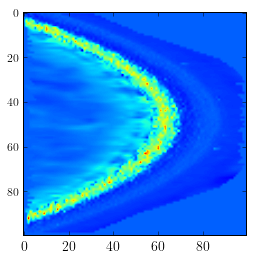

In [90]:
plt.imshow(dne[880,0:100,0,0:100])
plt.show()

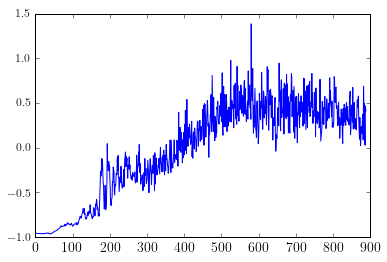

In [5]:
t = [t for t in range(0,ne.shape[0])]
plt.plot(t,dne[:,50,0,60]/10e19)
plt.show()

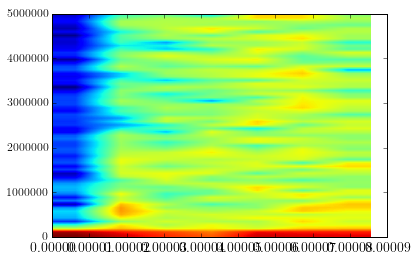

In [44]:
plt.specgram(dne[:,50,0,60], Fs=10000000, NFFT=128, noverlap=6)
plt.show()

In [6]:
dR = (0.908-0.88)/100
dZ = (0.1+0.1)/100
#R = [0.88+ip*dR for ip in range(100)]
R = [0.88+50*dR + ip*dR for ip in range(20)]
#Z = [-0.1+ip*dZ for ip in range(100)]
Z = [(-0.1+(50*dZ))+ip*dZ for ip in range(20)]

In [7]:
N_z = len(Z)
dt_z = dZ
T_z = dt_z*N_z
df_z = 1/T_z
dw_z = 2*np.pi/T_z
freq_z = np.fft.fftfreq(len(Z))

In [8]:
ne_tt[50:70,60].shape

(20,)

k_perp: [0.         0.10995574 0.21991149 0.32986723 0.43982297 0.54977871
 0.65973446 0.7696902  0.87964594 0.98960169 1.09955743 0.98960169
 0.87964594 0.7696902  0.65973446 0.54977871 0.43982297 0.32986723
 0.21991149 0.10995574]


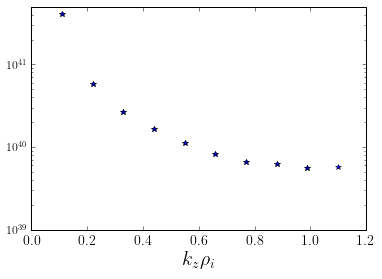

In [93]:
#Box width should give 157
fou_z = np.fft.fft(ne_tt[50:70,60]-np.mean(ne_tt[50:70,60]))
plt.semilogy(abs(freq_z*N_z*dw_z)*rho_i,abs(fou_z)**2,'*')
print('k_perp:',abs(freq_z*N_z*dw_z)*rho_i)
plt.ylim(1.0e39,5.0e41)
plt.xlabel(r'$k_z \rho_i$')
plt.show()

In [15]:
N_r = len(R)
dt_r = dR
T_r = dt_r*N_r
df_r = 1/T_r
dw_r = 2*np.pi/T_r
freq_r = np.fft.fftfreq(len(R))

k_perp [0.         0.78539816 1.57079633 2.35619449 3.14159265 3.92699082
 4.71238898 5.49778714 6.28318531 7.06858347 7.85398163 7.06858347
 6.28318531 5.49778714 4.71238898 3.92699082 3.14159265 2.35619449
 1.57079633 0.78539816]


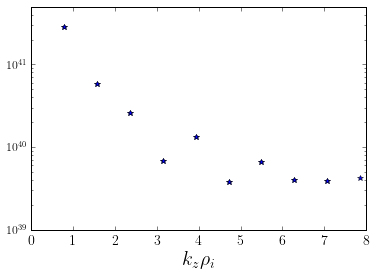

In [83]:
#Box width should give k=224
fou_r = np.fft.fft(ne_tt[50,50:70]-np.mean(ne_tt[50,50:70]))
plt.semilogy(abs(freq_r*N_r*dw_r)*rho_i,abs(fou_r)**2,'*')
print('k_perp',abs(freq_r*N_r*dw_r)*rho_i)
#plt.xlim(0,1130)
plt.ylim(1.0e39,5.0e41)
plt.xlabel(r'$k_z \rho_i$')
plt.show()

In [52]:
k_perp1 = np.sqrt(0.1099**2 + 0.785**2)
print(k_perp1)

0.7926556692536804


In [80]:
k_perpt = np.sqrt(314**2 + 224**2)
#k_perpt = np.sqrt(314**2 + 320**2)#c/m
rho_i = 7e-4#mp

In [81]:
print(k_perpt)
print(k_perpt*rho_i)

385.70973542289545
0.26999681479602683


In [26]:
dt = 9.454e-8
T = [x*dt for x in range(889)]
N_t = len(T)
T_t = dt*N_t
df_t = 1/T_t
dw_t = 2*np.pi/T_t
freq_t = np.fft.fftfreq(len(T))

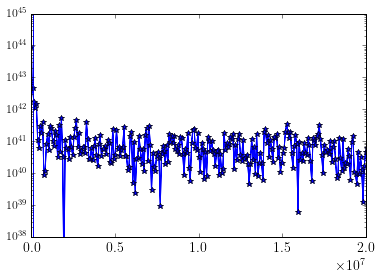

In [39]:
fou_t = np.fft.fft(dnrms[:,50,0,60])
plt.semilogy(abs(freq_t*N_t*dw_t),abs(fou_t)**2,'*-')
plt.xlim(0,2e7)
plt.ylim(1.0e38,1.0e45)
plt.axvline(x=74700)
plt.show()

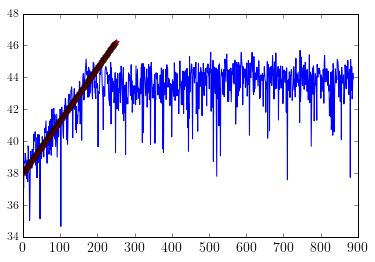

In [4]:
tm = [x for x in range(dne.shape[0])]
gamma = 0.033
y = [gamma*tip +38.0 for tip in tm]
plt.plot(tm[:],np.log(dnrms[:,50,5,60]))
plt.plot(tm[0:250],y[0:250],'r*')
#plt.ylim(0,1e20)
plt.show()

In [34]:
frequency = 75000/(2*np.pi)
print("frequency in Hz = ", frequency)
growth = gamma/dt
print("growth rate (1/s) = ", growth)

frequency in Hz =  11936.620731892152
growth rate (1/s) =  349058.5995345886


In [23]:
'''Doppler Shift to the plasma frame.'''
omega_sim = -12000*(2.*np.pi)#(cycl/sec)
k_perp = 322#(cycl/m)
V_phase = omega_sim/k_perp
V_pol_max = -1.1e4
V_pol_min = 1.5e3
V_pol_avg = -6.0e3
V_plasma_frame_max = V_phase-V_pol_max
V_plasma_frame_min = V_phase-V_pol_min
V_plasma_frame_avg = V_phase-V_pol_avg
omega_plfr_max = V_plasma_frame_max*k_perp
omega_plfr_min = V_plasma_frame_min*k_perp
omega_plfr_avg = V_plasma_frame_avg*k_perp
print(r"$\omega_{max}$ = ", omega_plfr_max)
print(r"$\omega_{min}$ = ", omega_plfr_min)
print(r"$\omega_{avg}$ = ", omega_plfr_avg)
print("max freq in Hz=", omega_plfr_max/(2.*np.pi))
print("min freq in Hz=", omega_plfr_min/(2.*np.pi))
print("avg freq in Hz=", omega_plfr_avg/(2.*np.pi))

$\omega_{max}$ =  3466601.776313845
$\omega_{min}$ =  -558398.223686155
$\omega_{avg}$ =  1856601.7763138448
max freq in Hz= 551726.8084314934
min freq in Hz= -88871.83751338546
avg freq in Hz= 295487.35005354177


## 2d fft with dne

In [94]:
dne.shape

(889, 100, 16, 100)